In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [3]:
# Load the Universal bank data

bankdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Ensemble Learning\Universalbank.csv", header=0)

# Copy the file to backup

bankdata_bk = bankdata.copy()

# Display first 5 records

bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Display bank data information

bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Delete the columns which are not influencing the target variable

del bankdata['ID']
del bankdata['ZIP Code']

In [6]:
# cols1 is variables - crating a dummy variables

cols1 = ['Family', 'Education']
print(cols1)

['Family', 'Education']


In [7]:
# cols2 variables - MinMaxScalar function

cols2 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
print(cols2)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


In [8]:
# Create dummy variable for all range values

bankdata = pd.get_dummies(bankdata, columns=cols1)
bankdata.head().T

,0,1,2,3,4
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
Securities Account,1.0,1.0,0.0,0.0,0.0
CD Account,0.0,0.0,0.0,0.0,0.0
Online,0.0,0.0,0.0,0.0,0.0
CreditCard,0.0,0.0,0.0,0.0,1.0


In [9]:
# Identify the independent and Target variables

IndepVar = []
for col in bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bankdata[IndepVar]
y = bankdata[TargetVar]

In [10]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [11]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols2] = mmscaler.fit_transform(x_train[cols2])
x_train = pd.DataFrame(x_train)

x_test[cols2] = mmscaler.fit_transform(x_test[cols2])
x_test = pd.DataFrame(x_test)

In [12]:
# Load the result dataset

CSResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Ensemble Learning\CSResults.csv", header=0)
CSResults.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Boosting Algorithms - Gradient Boosting Machine (GBM)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 53 239]
 [  8 700]]
Outcome values : 
 53 239 8 700
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.18      0.30       292
           0       0.75      0.99      0.85       708

    accuracy                           0.75      1000
   macro avg       0.81      0.59      0.58      1000
weighted avg       0.78      0.75      0.69      1000

Accuracy : 75.3 %
Precision : 86.9 %
Recall : 18.2 %
F1 Score : 0.3
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 58.6 %
MCC : 0.323
roc_auc_score: 0.585


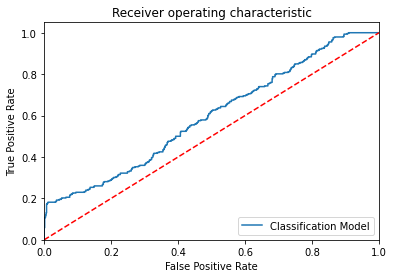

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[108 184]
 [208 500]]
Outcome values : 
 108 184 208 500
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.37      0.36       292
           0       0.73      0.71      0.72       708

    accuracy                           0.61      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.62      0.61      0.61      1000

Accuracy : 60.8 %
Precision : 34.2 %
Recall : 37.0 %
F1 Score : 0.355
Specificity or True Negative Rate : 70.6 %
Balanced Accuracy : 53.8 %
MCC : 0.074
roc_auc_score: 0.538


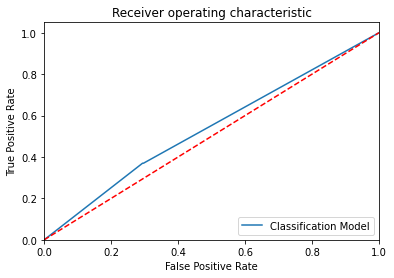

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 73 219]
 [ 86 622]]
Outcome values : 
 73 219 86 622
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.25      0.32       292
           0       0.74      0.88      0.80       708

    accuracy                           0.69      1000
   macro avg       0.60      0.56      0.56      1000
weighted avg       0.66      0.69      0.66      1000

Accuracy : 69.5 %
Precision : 45.9 %
Recall : 25.0 %
F1 Score : 0.324
Specificity or True Negative Rate : 87.9 %
Balanced Accuracy : 56.4 %
MCC : 0.16
roc_auc_score: 0.564


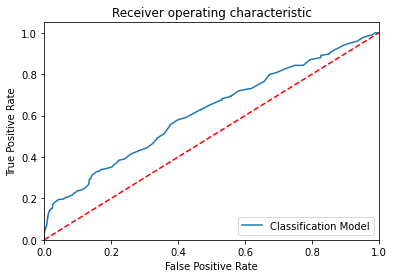

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 90 202]
 [119 589]]
Outcome values : 
 90 202 119 589
Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.31      0.36       292
           0       0.74      0.83      0.79       708

    accuracy                           0.68      1000
   macro avg       0.59      0.57      0.57      1000
weighted avg       0.65      0.68      0.66      1000

Accuracy : 67.9 %
Precision : 43.1 %
Recall : 30.8 %
F1 Score : 0.359
Specificity or True Negative Rate : 83.2 %
Balanced Accuracy : 57.0 %
MCC : 0.157
roc_auc_score: 0.57


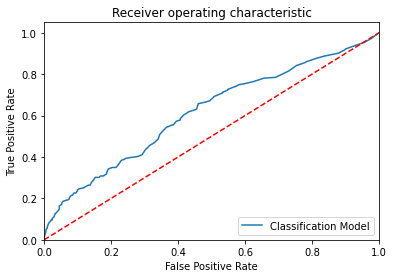

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 86 206]
 [107 601]]
Outcome values : 
 86 206 107 601
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.29      0.35       292
           0       0.74      0.85      0.79       708

    accuracy                           0.69      1000
   macro avg       0.60      0.57      0.57      1000
weighted avg       0.66      0.69      0.67      1000

Accuracy : 68.7 %
Precision : 44.6 %
Recall : 29.5 %
F1 Score : 0.355
Specificity or True Negative Rate : 84.9 %
Balanced Accuracy : 57.2 %
MCC : 0.165
roc_auc_score: 0.572


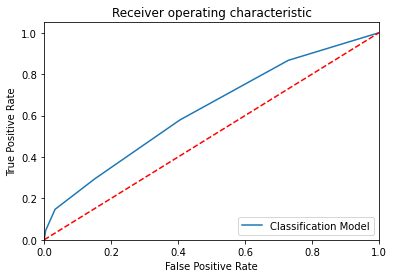

-----------------------------------------------------------------------------------------------------
Model Name:  MLPClassifier()
Confusion matrix : 
 [[ 52 240]
 [  8 700]]
Outcome values : 
 52 240 8 700
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.18      0.30       292
           0       0.74      0.99      0.85       708

    accuracy                           0.75      1000
   macro avg       0.81      0.58      0.57      1000
weighted avg       0.78      0.75      0.69      1000

Accuracy : 75.2 %
Precision : 86.7 %
Recall : 17.8 %
F1 Score : 0.295
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 58.4 %
MCC : 0.319
roc_auc_score: 0.583


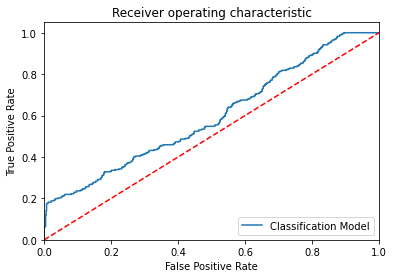

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 53 239]
 [  9 699]]
Outcome values : 
 53 239 9 699
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.18      0.30       292
           0       0.75      0.99      0.85       708

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.69      1000

Accuracy : 75.2 %
Precision : 85.5 %
Recall : 18.2 %
F1 Score : 0.299
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 58.4 %
MCC : 0.318
roc_auc_score: 0.584


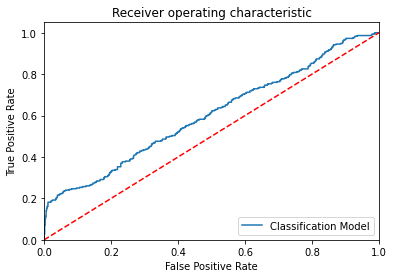

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 47 245]
 [  5 703]]
Outcome values : 
 47 245 5 703
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.16      0.27       292
           0       0.74      0.99      0.85       708

    accuracy                           0.75      1000
   macro avg       0.82      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000

Accuracy : 75.0 %
Precision : 90.4 %
Recall : 16.1 %
F1 Score : 0.273
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 57.7 %
MCC : 0.315
roc_auc_score: 0.577


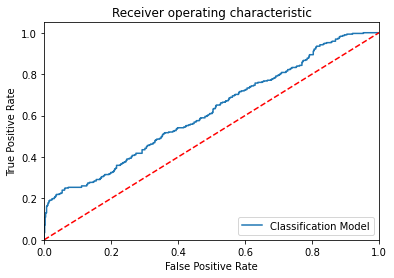

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 75 217]
 [ 72 636]]
Outcome values : 
 75 217 72 636
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.26      0.34       292
           0       0.75      0.90      0.81       708

    accuracy                           0.71      1000
   macro avg       0.63      0.58      0.58      1000
weighted avg       0.68      0.71      0.68      1000

Accuracy : 71.1 %
Precision : 51.0 %
Recall : 25.7 %
F1 Score : 0.342
Specificity or True Negative Rate : 89.8 %
Balanced Accuracy : 57.8 %
MCC : 0.199
roc_auc_score: 0.578


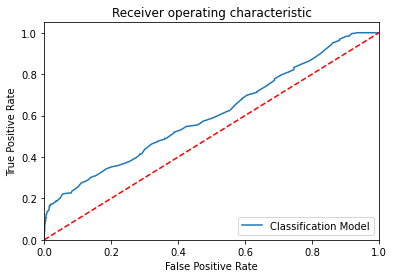

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 49 243]
 [ 12 696]]
Outcome values : 
 49 243 12 696
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.17      0.28       292
           0       0.74      0.98      0.85       708

    accuracy                           0.74      1000
   macro avg       0.77      0.58      0.56      1000
weighted avg       0.76      0.74      0.68      1000

Accuracy : 74.5 %
Precision : 80.3 %
Recall : 16.8 %
F1 Score : 0.278
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 57.6 %
MCC : 0.287
roc_auc_score: 0.575


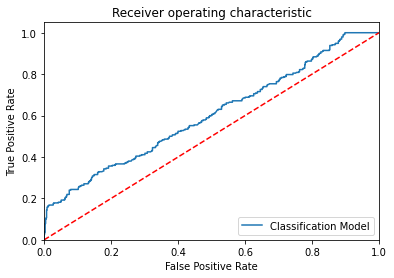

-----------------------------------------------------------------------------------------------------


In [14]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelMLP = MLPClassifier()
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelMLP, ModelGNB, ModelSVM, modelBAG, ModelGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [16]:
# Results with comparing the all the algorithms 

CSResults.to_csv("C://Users//Admin//Downloads//Raju Sir DLS//Ensemble Learning//CSResultsNew.csv")

CSResults.head(10)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0.753,0.869,0.182,0.3,0.989,0.323,0.585104,0.586
1,DecisionTreeClassifier(),0.608,0.342,0.37,0.355,0.706,0.074,0.538039,0.538
2,"(DecisionTreeClassifier(max_features='auto', r...",0.695,0.459,0.25,0.324,0.879,0.16,0.564266,0.564
3,"(ExtraTreeClassifier(random_state=846229428), ...",0.679,0.431,0.308,0.359,0.832,0.157,0.57007,0.57
4,KNeighborsClassifier(),0.687,0.446,0.295,0.355,0.849,0.165,0.571695,0.572
5,MLPClassifier(),0.752,0.867,0.178,0.295,0.989,0.319,0.583391,0.584
6,GaussianNB(),0.752,0.855,0.182,0.299,0.987,0.318,0.584397,0.584
7,SVC(probability=True),0.75,0.904,0.161,0.273,0.993,0.315,0.576948,0.577
8,(DecisionTreeClassifier(random_state=137397911...,0.711,0.51,0.257,0.342,0.898,0.199,0.577577,0.578
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.745,0.803,0.168,0.278,0.983,0.287,0.57543,0.576
